In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
dataset_path = '/kaggle/input/orange-dataset-deep-learning/Orange_Dataset'
train_path = os.path.join(dataset_path, 'train')
test_path = os.path.join(dataset_path, 'test')

# Classes
classes = ['Anthracnose', 'BlackSpot', 'Healthy']

In [4]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for class_name in classes:
        class_folder = os.path.join(folder, class_name)
        label = classes.index(class_name)
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (32, 32)) # making all image in same shape otherwise model gives error
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

In [5]:
# Load training data
X_train, y_train = load_images_from_folder(train_path)

In [6]:
# Load testing data
X_test, y_test = load_images_from_folder(test_path)

In [7]:
# print shape
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((90, 32, 32, 3), (90,), (75, 32, 32, 3), (75,))

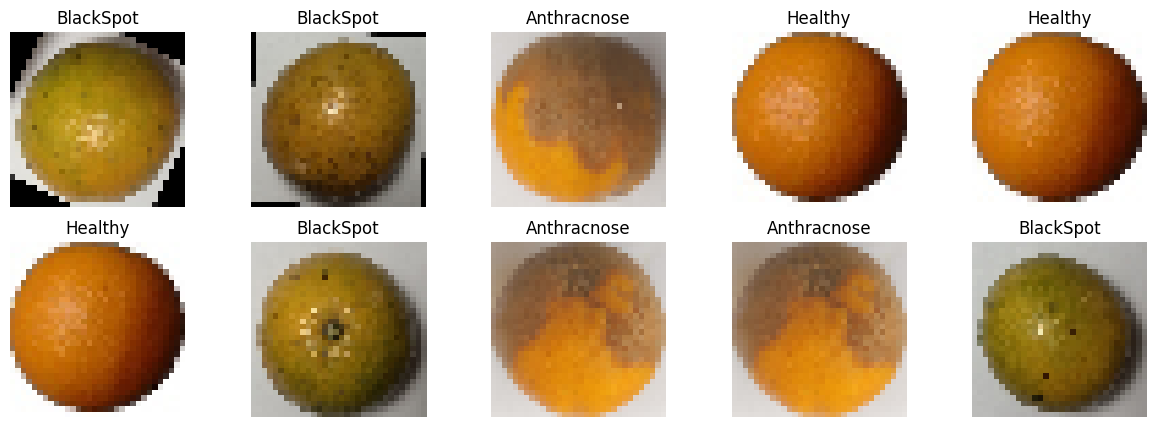

In [8]:
# Plot some sample images from X_train
def plot_samples(X, y, categories, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        idx = np.random.randint(0, len(X))
        plt.subplot(2, 5, i+1)
        plt.imshow(cv2.cvtColor(X[idx], cv2.COLOR_BGR2RGB))
        plt.title(categories[y[idx]])
        plt.axis('off')
    plt.show()

# Plot 10 random samples from X_train
plot_samples(X_train, y_train, classes)

In [9]:
# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
def create_cnn_model(input_shape=(32,32, 3)):
    model = models.Sequential()
    
    # First convolutional layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', strides=1, padding='valid', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Second convolutional layer
    model.add(layers.Conv2D(16, (3, 3), activation='relu', strides=1,padding='valid'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    
    # Flatten the output of the convolutional layers
    model.add(layers.Flatten())
    # Fully connected layer
    model.add(layers.Dense(64, activation='relu'))
    # Output layer with softmax activation for classification
    model.add(layers.Dense(3, activation='softmax'))
    
    return model

# Create the model
model = create_cnn_model()

# Print the model summary
model.summary()

2024-06-14 15:31:09.579458: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-14 15:31:09.579597: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-14 15:31:09.722839: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,643 (166.57 KB)

 Trainable params: 42,643 (166.57 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compile the model with a specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.3008 - loss: 1.1288 - val_accuracy: 0.0000e+00 - val_loss: 1.5857
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7656 - loss: 0.9757 - val_accuracy: 0.0000e+00 - val_loss: 2.0024
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7734 - loss: 0.9443 - val_accuracy: 0.0000e+00 - val_loss: 1.8158
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8121 - loss: 0.8805 - val_accuracy: 0.0000e+00 - val_loss: 1.6339
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8424 - loss: 0.7917 - val_accuracy: 0.0000e+00 - val_loss: 1.5561


In [13]:
from sklearn.metrics import classification_report, confusion_matrix,precision_score,recall_score,f1_score

In [15]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5213 - loss: 0.9229 
Test accuracy: 0.47999998927116394


In [17]:
# Predict the classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis=1)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.44      0.55        25
           1       0.42      1.00      0.59        25
           2       0.00      0.00      0.00        25

    accuracy                           0.48        75
   macro avg       0.38      0.48      0.38        75
weighted avg       0.38      0.48      0.38        75



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
print("Precision_Score: ",precision_score(y_test, y_pred_classes,average='weighted'))
print("Recall_Score: ",recall_score(y_test, y_pred_classes,average='weighted'))
print("F1_Score: ",f1_score(y_test, y_pred_classes,average='weighted'))

Precision_Score:  0.38333333333333336
Recall_Score:  0.48
F1_Score:  0.37941176470588234


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


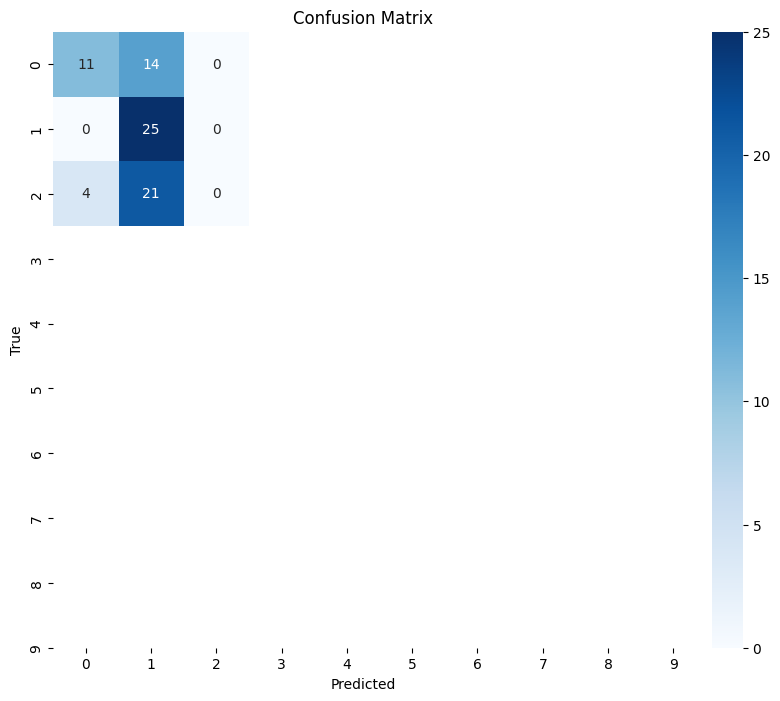

In [19]:
import seaborn as sns
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()